Okay, let's continue to improve our prediction. Here, we'll be focuing on looking on the numerical and categorical column.

In [27]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
train = pd.read_csv("Datasets/train.csv")
test = pd.read_csv("Datasets/test.csv")

In [3]:
# Gets the categorical and numerical columns
categorical = [c for c in train.columns 
               if train.dtypes[c] == 'object']

numerical = [c for c in train.columns 
             if train.dtypes[c] != 'object']

# Removes the Id and prediction target
numerical.remove('Id')
numerical.remove('SalePrice')

In [4]:
len(numerical), len(categorical)

(36, 43)

In [5]:
print(categorical)
print(numerical)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclos

In [6]:
train[categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [7]:
train[numerical].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


Notice that MSSubClass should be categorical

In [8]:
to_cat = ['MSSubClass']
for col in to_cat:
    numerical.remove(col)
    categorical.append(col)

Let's do ordinal encoding to some columns where order matters!

In [9]:
ordinal_map = {
    "ExterQual": [np.nan,'Po','Fa','TA','Gd','Ex'], 
    "ExterCond": [np.nan,'Po','Fa','TA','Gd','Ex'], 
    "BsmtQual": [np.nan,'Po','Fa','TA','Gd','Ex'], 
    "BsmtCond": [np.nan,'Po','Fa','TA','Gd','Ex'],
    "FireplaceQu": [np.nan,'Po','Fa','TA','Gd','Ex'], 
    "KitchenQual": [np.nan,'Po','Fa','TA','Gd','Ex'], 
    "GarageQual": [np.nan,'Po','Fa','TA','Gd','Ex'], 
    "GarageCond": [np.nan,'Po','Fa','TA','Gd','Ex'],
    "PoolQC": [np.nan,'Po','Fa','TA','Gd','Ex'], 
    "LotShape": [np.nan,'Reg','IR1' ,'IR2','IR3'], 
    "BsmtExposure": [np.nan,'No','Mn','Av','Gd'], 
    "BsmtFinType1": [np.nan,'Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ], 
    "BsmtFinType2": [np.nan,'Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ], 
    "HeatingQC": [np.nan,'Po','Fa','TA','Gd','Ex'], 
    "Functional": [np.nan,'Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'], 
    "GarageFinish": [np.nan,'Unf','RFn','Fin'], 
    "Fence": [np.nan,'MnWw','GdWo','MnPrv','GdPrv'],
    "SaleCondition": [np.nan, 'Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial'],
}

ordinal = [col for col in ordinal_map.keys()]
onehot = [col for col in categorical if col not in ordinal_map.keys()]

In [10]:
print(ordinal)
print(onehot)

['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'KitchenQual', 'GarageQual', 'GarageCond', 'PoolQC', 'LotShape', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Functional', 'GarageFinish', 'Fence', 'SaleCondition']
['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'MSSubClass']


In [11]:
numericalp = numerical.copy()
numericalp = ['SalePrice'] + numericalp

<AxesSubplot:>

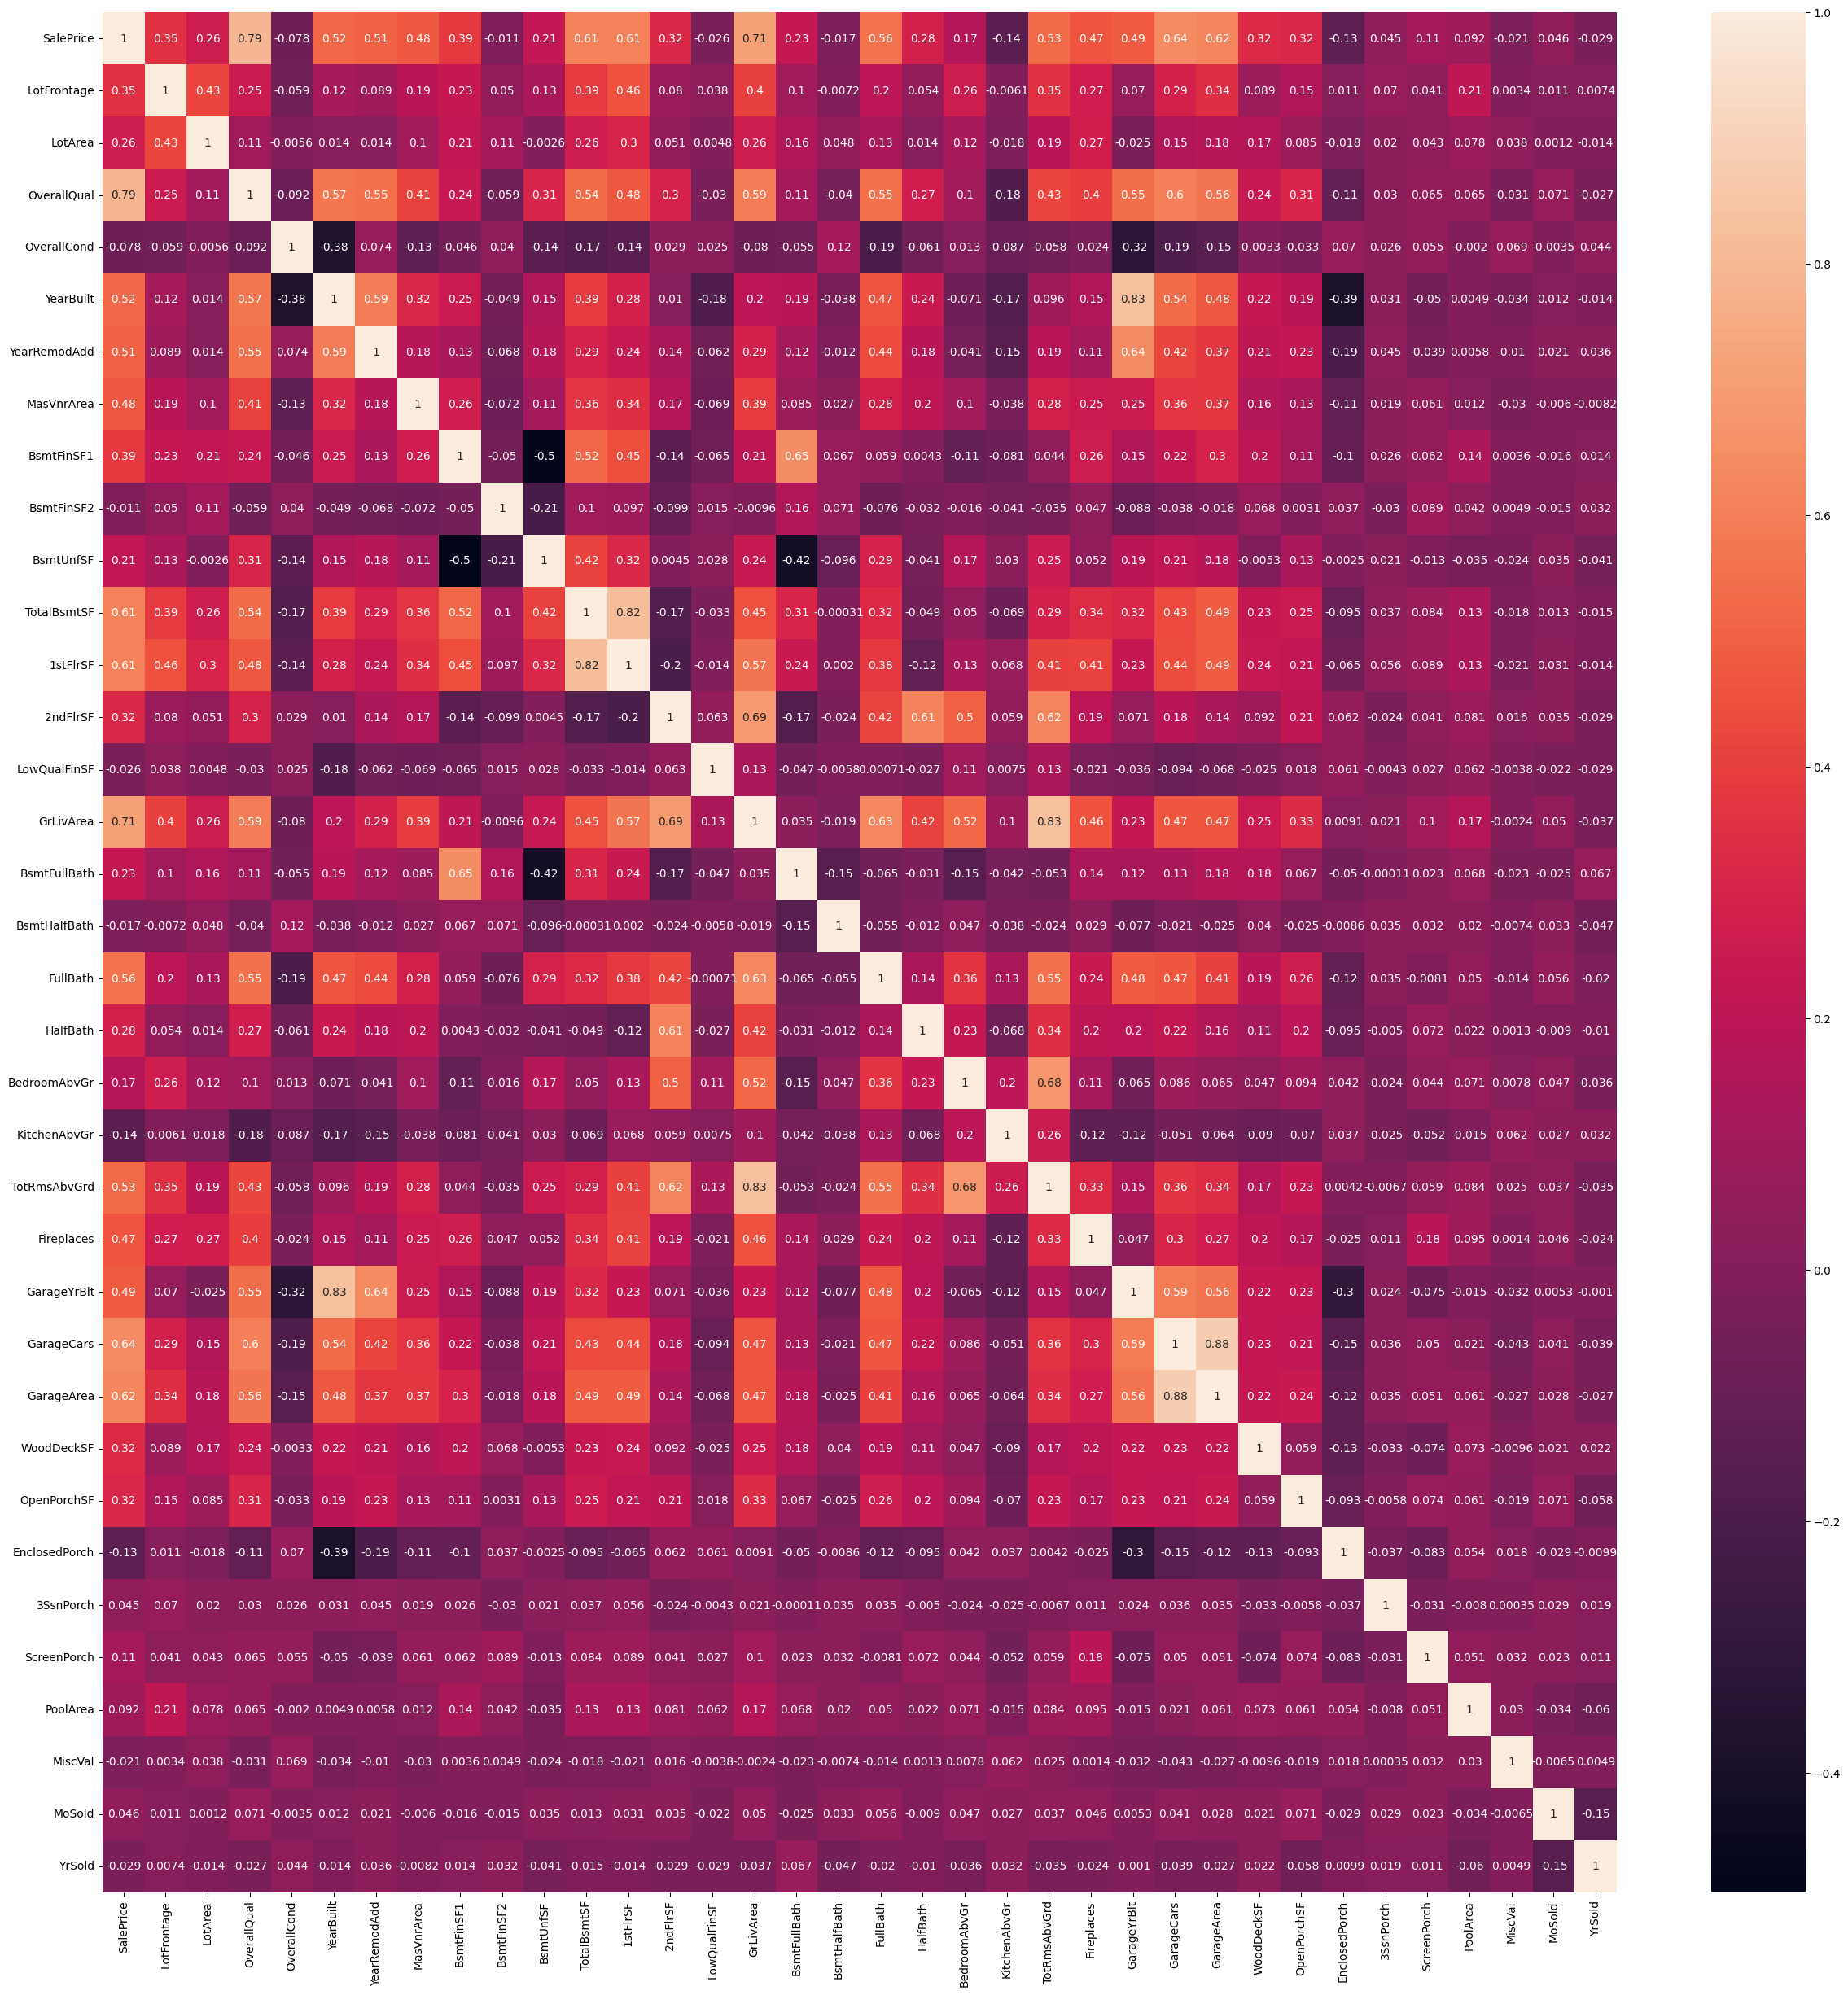

In [13]:
corr = train[numericalp].corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, xticklabels=1, yticklabels=1, annot=True)

Looking closer at correlations

In [14]:
high_corr_pairs = []
thres_pos = 0.8
thres_neg = -0.3

# Assuming 'corr' is a pandas DataFrame containing correlation values
for col in corr:
    # Extract columns with correlations above thres_pos or below thres_neg
    correlated_cols = corr.index[(corr[col] > thres_pos) | (corr[col] < thres_neg)]
    
    for correlated_col in correlated_cols:
        if correlated_col != col:
            correlation_value = corr.at[col, correlated_col]  # Access correlation value directly from the DataFrame
            high_corr_pairs.append((col, correlated_col, correlation_value))

# Separate positive and negative correlation pairs
pairs_pos, pairs_neg = [], []
unique_pairs = set()

for pair in high_corr_pairs:
    col, ccol, correlation_value = pair
    inverse_pair = (ccol, col, correlation_value)
    
    # Check for uniqueness to avoid duplicates
    if pair not in unique_pairs and inverse_pair not in unique_pairs:
        unique_pairs.add(pair)
        
        # Categorize pairs into positive and negative correlations
        if correlation_value > 0:
            pairs_pos.append(pair)
        else:
            pairs_neg.append(pair)

pairs = pairs_pos + pairs_neg     
print(f"Pair Numerical Columns Highest and Lowest Correlations (treshold is {thres_pos} and {thres_neg})\n")   
for pair in pairs:
    col, ccol, correlation_value = pair
    print(f'{col:<13} {ccol:<14} {correlation_value}')


Pair Numerical Columns Highest and Lowest Correlations (treshold is 0.8 and -0.3)

YearBuilt     GarageYrBlt    0.8256674841743408
TotalBsmtSF   1stFlrSF       0.8195299750050339
GrLivArea     TotRmsAbvGrd   0.8254893743088425
GarageCars    GarageArea     0.882475414281462
OverallCond   YearBuilt      -0.37598319560698945
OverallCond   GarageYrBlt    -0.32429673252939795
YearBuilt     EnclosedPorch  -0.3872677829280785
BsmtFinSF1    BsmtUnfSF      -0.49525146925701125
BsmtUnfSF     BsmtFullBath   -0.42290047738321335


In [15]:
print("Correlations with Target Column\n")
corr = train[numericalp].corr()

thres_pos = 0.5
thres_neg = -0.1

neg, neut, pos = [], [], []
for i in range(len(corr['SalePrice'])):
    cor = corr['SalePrice'][i]
    if cor > thres_pos:
        pos.append([cor, corr['SalePrice'].index[i]])
    elif cor < thres_neg:
        neg.append([cor, corr['SalePrice'].index[i]])
    else:
        neut.append([cor, corr['SalePrice'].index[i]])

print(f"Positive Correlations (treshold is {thres_pos})")
for cor in pos:
    score, col = cor
    if col == 'SalePrice': continue
    print(f'{col:<15}: {score:.3f}')

print(f"\nNegative Correlations (treshold is {thres_neg})")
for cor in neg:
    score, col = cor
    print(f'{col:<15}: {score:.3f}')

Correlations with Target Column

Positive Correlations (treshold is 0.5)
OverallQual    : 0.791
YearBuilt      : 0.523
YearRemodAdd   : 0.507
TotalBsmtSF    : 0.614
1stFlrSF       : 0.606
GrLivArea      : 0.709
FullBath       : 0.561
TotRmsAbvGrd   : 0.534
GarageCars     : 0.640
GarageArea     : 0.623

Negative Correlations (treshold is -0.1)
KitchenAbvGr   : -0.136
EnclosedPorch  : -0.129


In [16]:
for col in train.columns:
    if col == 'SalePrice' or col == 'LotFrontage' or col == 'Id': continue
    if col not in numerical and col not in categorical:
        print("Columns to be dropped", col)
        train = train.drop(columns=col)
        test = test.drop(columns=col)

In [17]:
X = train.drop(columns='SalePrice')
X_test = test
y_train = train["SalePrice"]
X_concat = pd.concat([X, X_test])
X_concat
# Notice the number of rows in X_concat, it's concatinating train and test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,

Use pipeline for clean code

In [18]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(fill_value=0)),
    ('scaler', StandardScaler())
])

frontage_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean', add_indicator=True)),
    ('scaler', StandardScaler())
])

onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True)),
    ('onehot', OneHotEncoder(sparse=False, drop='first')) # Using 'drop' to avoid multicollinearity
])

ordinal_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(
        categories=[cat for cat in ordinal_map.values()],
        unknown_value=np.nan,
        handle_unknown='use_encoded_value',
    ))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, numerical),
    ('frontage', frontage_pipeline, ['LotFrontage']),
    ('onehot', onehot_pipeline, onehot),
    ('ordinal', ordinal_pipeline, ordinal)
])

In [19]:
X_tf = preprocessor.fit_transform(X_concat)

In [20]:
num_of_row_in_train = X.shape[0]
X_train = pd.DataFrame(X_tf[:num_of_row_in_train, :])
X_test = pd.DataFrame(X_tf[num_of_row_in_train:, :])

In [22]:
X_train.isna().sum().sort_values(ascending=False).head(11)

213    1453
221    1179
209     690
212      81
220      81
211      81
217      38
215      38
207      37
216      37
208      37
dtype: int64

Looking at final data and export it!

In [23]:
train = pd.concat([X_train, y_train], axis=1)
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,SalePrice
0,-0.202068,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.525202,0.580907,-0.293130,-0.934863,-0.444328,-0.773861,1.207379,-0.101197,0.413547,1.087023,-0.249895,0.781366,1.232599,0.169927,-0.207698,0.986849,-0.924311,1.000929,0.306528,0.348900,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,0.157646,-0.202068,-0.446938,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,3.0,4.0,3.0,NaN,4.0,3.0,3.0,NaN,1.0,1.0,6.0,1.0,5.0,7.0,2.0,NaN,1.0,208500
1,0.501870,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.572250,1.178112,-0.293130,-0.629896,0.477111,0.261075,-0.785025,-0.101197,-0.471891,-0.819679,3.822419,0.781366,-0.756321,0.169927,-0.207698,-0.287758,0.623632,-0.085000,0.306528,-0.059792,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.446925,-0.602962,0.501870,-0.446938,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,1.0,4.0,5.0,1.0,5.0,7.0,2.0,NaN,1.0,181500
2,-0.061280,0.137197,0.646183,-0.507284,0.980221,0.848965,0.334828,0.097873,-0.293130,-0.288516,-0.299076,-0.610718,1.235375,-0.101197,0.563755,1.087023,-0.249895,0.781366,1.232599,0.169927,-0.207698,-0.287758,0.623632,0.920490,0.306528,0.627553,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,1.026753,0.157646,-0.061280,-0.446938,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [24]:
test = X_test
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222
0,0.501870,0.184371,-0.772552,0.391237,-0.340510,-1.113625,-0.572250,0.058352,0.558197,-0.661759,-0.385319,-0.671897,-0.785025,-0.101197,-1.195262,-0.819679,-0.249895,-1.027363,-0.756321,-1.045801,-0.207698,-0.925062,-0.924311,-0.688294,-1.006906,1.194149,0.365916,-0.702843,-0.359601,-0.103331,1.850256,-0.06315,-0.089592,-0.078505,1.678860,0.501870,-0.446938,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,3.0,3.0,NaN,3.0,3.0,3.0,NaN,1.0,1.0,3.0,2.0,3.0,7.0,1.0,3.0,1.0
1,0.548800,0.519791,-0.063185,0.391237,-0.439565,-1.257229,0.032468,1.057354,-0.293130,-0.352241,0.629171,0.431865,-0.785025,-0.101197,-0.339470,-0.819679,-0.249895,-1.027363,1.232599,0.169927,-0.207698,-0.287758,-0.924311,-0.808953,-1.006906,-0.747138,2.365838,-0.170014,-0.359601,-0.103331,-0.285935,-0.06315,21.944410,-0.078505,1.678860,0.548800,-0.446938,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,NaN,4.0,3.0,3.0,NaN,2.0,1.0,5.0,1.0,3.0,7.0,1.0,NaN,1.0
2,0.220295,0.464374,-0.772552,-0.507284,0.848148,0.657493,-0.572250,0.767534,-0.293130,-0.964449,-0.280920,-0.590326,0.850426,-0.101197,0.253457,-0.819679,-0.249895,0.781366,1.232599,0.169927,-0.207698,-0.287758,0.623632,0.759611,0.306528,0.042381,0.935064,-0.199616,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.183764,1.678860,0.220295,-0.446938,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [25]:
# train.to_csv("Datasets/train_le_ohe_oe.csv", index=False)
# test.to_csv("Datasets/test_le_ohe_oe.csv", index=False)